In [172]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [248]:
D = 2 # dimensionality, we have x1 and x2, so pick 2, this is also number of nodes on the input layer
K = 2 # number of classes, which is also number of nodes on the output layer, we pick 2

In [249]:
# Linearly separable case for the Logistic regression
filePrefix = 'LinearlySeparableCase-'
X = np.array([[98, 5.5],
    [120, 5.8],
    [168, 6.2],
    [200, 5.5],
    [210, 5],
    [168, 5]])
y= [0,0,0,1,1,1]

In [250]:
print y
colorMap = []
for i in y:
    if i==0:
        colorMap.append('w')
    if i==1:
        colorMap.append('k')
print colorMap

[0, 0, 0, 1, 1, 1]
['w', 'w', 'w', 'k', 'k', 'k']


[[  98.     5.5]
 [ 120.     5.8]
 [ 168.     6.2]
 [ 200.     5.5]
 [ 210.     5. ]
 [ 168.     5. ]]
[0, 0, 0, 1, 1, 1]


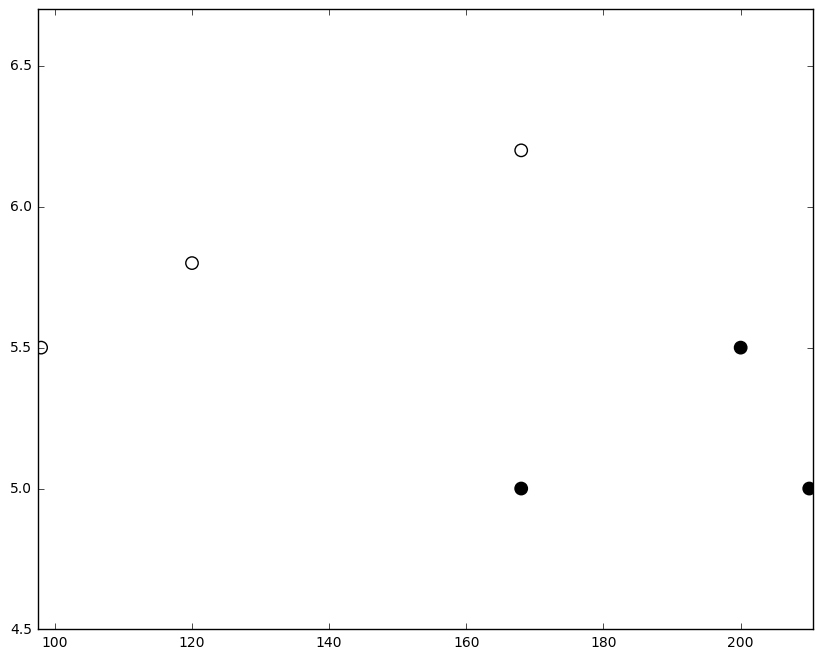

In [251]:

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=colorMap, s=80)
plt.xlim([np.min(X[:,0])-.5,np.max(X[:,0])+.5])
plt.ylim([np.min(X[:,1])-.5,np.max(X[:,1])+.5])
fig.savefig(filePrefix + 'raw.png')
print X
print y

[[ 0.          0.41666667]
 [ 0.19642857  0.66666667]
 [ 0.625       1.        ]
 [ 0.91071429  0.41666667]
 [ 1.          0.        ]
 [ 0.625       0.        ]]
[0, 0, 0, 1, 1, 1]


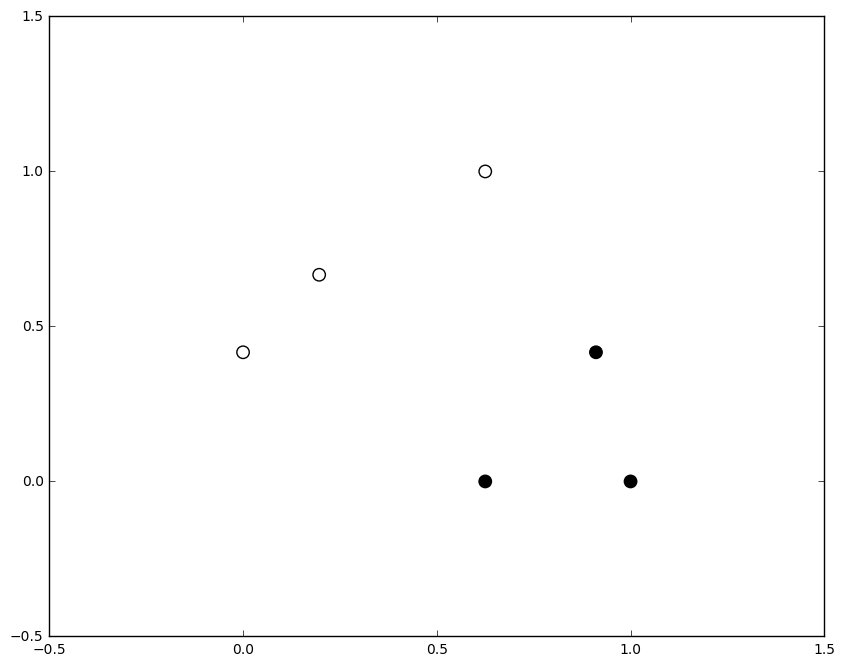

In [252]:
# Step 1
# Normalize data 

X1 = map(lambda x: (x-np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0])), X[:,0])
X2 = map(lambda x: (x-np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1])), X[:,1])
X = np.array(zip(X1,X2))

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=colorMap, s=80)
plt.xlim([np.min(X[:,0])-.5,np.max(X[:,0])+.5])
plt.ylim([np.min(X[:,1])-.5,np.max(X[:,1])+.5])
fig.savefig(filePrefix + 'normalized.png')
print X
print y

In [253]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1
reg = 1e-3 # regularization strength

losses = []
weights = []
biases = []

contourData = []

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(20000):
  
    # evaluate class scores, [N x K], this hasonly one layer, so scores are predicted results
    scores = np.dot(X, W) + b 

    if i %100 ==0:
        h = 0.08
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        contour =[zip(xx.flatten(), yy.flatten(), Z.flatten())]
        contourData.append(contour)
        
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    
    #   if i % 10 == 0:
    #     print "iteration %d: loss %f" % (i, loss)
    
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    
    if i %100 ==0:
        losses.append(loss.tolist())
        weights.append(W.tolist())
        biases.append(b.tolist())

print len(weights)
with open(filePrefix + "LRweights.txt","w") as f:
    f.write(json.dumps(weights))

print len(losses)
with open(filePrefix + "LRlosses.txt","w") as f:
    f.write(json.dumps(losses))

print len(biases)
with open(filePrefix + "LRbiases.txt","w") as f:
    f.write(json.dumps(biases))
    
print len(contourData)
with open(filePrefix + "LRcontour.txt","w") as f:
    f.write(json.dumps(contourData))

200
200
200
200


In [254]:
print W.shape

(2, 2)


In [255]:
print b.shape

(1, 2)


In [256]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 1.00


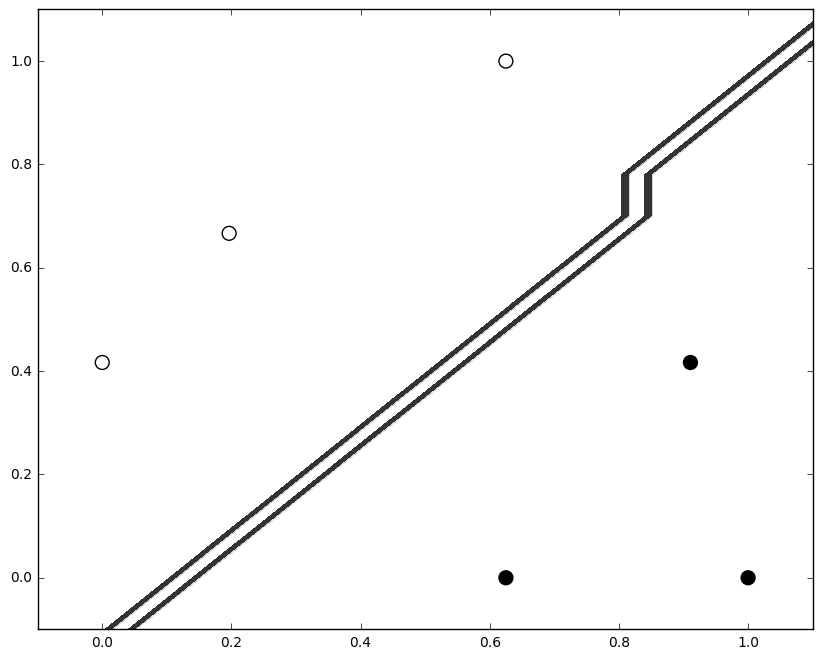

In [257]:
# plot the resulting classifier
h = 0.08
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx,yy, Z, colors=('w', 'w', 'k'), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=colorMap, s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
fig.savefig(filePrefix + 'LR_contourf.png')

In [258]:
print Z.shape
print Z

(16, 16)
[[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [259]:
# Linearly non-separable case for the NN
filePrefix = 'LinearlyNonSeparableCase-'
X = np.array([[98, 5.5],
    [155, 5.2],
    [120, 5.7],
    [168, 6.2],
    [200, 5.5],
    [210, 5],
    [168, 5],
    [110, 6.0],
    [125, 5.8]])
y= [0,0,0,0,1,1,1,1,1]


In [260]:
print y
colorMap = []
for i in y:
    if i==0:
        colorMap.append('w')
    if i==1:
        colorMap.append('k')
print colorMap

[0, 0, 0, 0, 1, 1, 1, 1, 1]
['w', 'w', 'w', 'w', 'k', 'k', 'k', 'k', 'k']


[[  98.     5.5]
 [ 155.     5.2]
 [ 120.     5.7]
 [ 168.     6.2]
 [ 200.     5.5]
 [ 210.     5. ]
 [ 168.     5. ]
 [ 110.     6. ]
 [ 125.     5.8]]
[0, 0, 0, 0, 1, 1, 1, 1, 1]


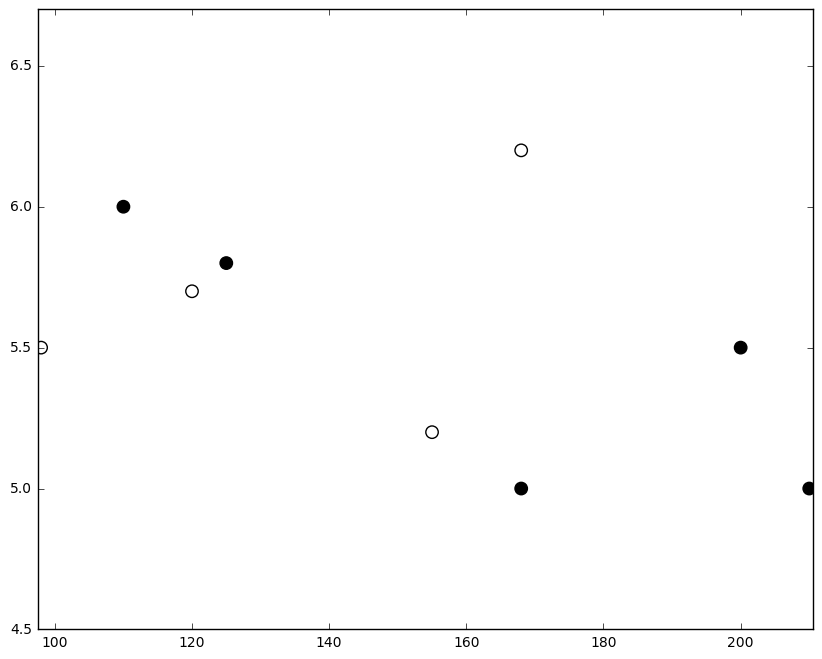

In [261]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=colorMap, s=80)
plt.xlim([np.min(X[:,0])-.5,np.max(X[:,0])+.5])
plt.ylim([np.min(X[:,1])-.5,np.max(X[:,1])+.5])
fig.savefig(filePrefix + 'raw.png')
print X
print y

[[ 0.          0.41666667]
 [ 0.50892857  0.16666667]
 [ 0.19642857  0.58333333]
 [ 0.625       1.        ]
 [ 0.91071429  0.41666667]
 [ 1.          0.        ]
 [ 0.625       0.        ]
 [ 0.10714286  0.83333333]
 [ 0.24107143  0.66666667]]
[0, 0, 0, 0, 1, 1, 1, 1, 1]


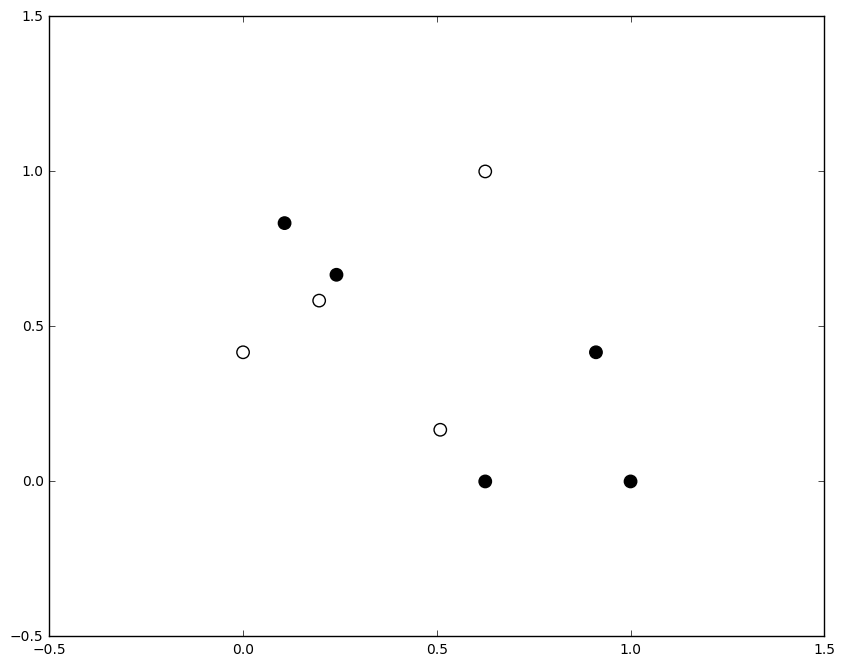

In [262]:
# Step 1
# Normalize data 

X1 = map(lambda x: (x-np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0])), X[:,0])
X2 = map(lambda x: (x-np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1])), X[:,1])
X = np.array(zip(X1,X2))

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=colorMap, s=80)
plt.xlim([np.min(X[:,0])-.5,np.max(X[:,0])+.5])
plt.ylim([np.min(X[:,1])-.5,np.max(X[:,1])+.5])
fig.savefig(filePrefix + 'normalized.png')
print X
print y

In [263]:
# initialize parameters randomly
h = 100 # size of node on the hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# store intermediate values
losses = []

# layer 1
weights = []
biases = []

# layer 2
weights2 = []
biases2 = []

contourData = []

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(20000):
  
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
    
    if i%100==0:
        h = 0.08
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        contour =[zip(xx.flatten(), yy.flatten(), Z.flatten())]
        contourData.append(contour)

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
    if i%100==0:
        losses.append(loss.tolist())
        weights.append(W.tolist())
        biases.append(b.tolist())

        weights2.append(W2.tolist())
        biases2.append(b2.tolist())

print len(losses)        
with open(filePrefix + "NNlosses.txt","w") as f:
    f.write(json.dumps(losses))

print len(weights)
with open(filePrefix + "NNweights.txt","w") as f:
    f.write(json.dumps(weights))

print len(biases)
with open(filePrefix + "NNbiases.txt","w") as f:
    f.write(json.dumps(biases))  

print len(weights2)
with open(filePrefix + "NNweights2.txt","w") as f:
    f.write(json.dumps(weights2))

print len(biases2)
with open(filePrefix + "NNbiases2.txt","w") as f:
    f.write(json.dumps(biases2))  

print len(contourData)
with open(filePrefix + "NNcontour.txt","w") as f:
    f.write(json.dumps(contourData))

iteration 0: loss 0.693160
iteration 1000: loss 0.235666
iteration 2000: loss 0.240372
iteration 3000: loss 0.175516
iteration 4000: loss 0.206773
iteration 5000: loss 0.308316
iteration 6000: loss 0.222184
iteration 7000: loss 0.214840
iteration 8000: loss 0.242467
iteration 9000: loss 0.237257
iteration 10000: loss 0.243583
iteration 11000: loss 0.139388
iteration 12000: loss 0.497965
iteration 13000: loss 0.212155
iteration 14000: loss 0.179390
iteration 15000: loss 0.179967
iteration 16000: loss 0.154675
iteration 17000: loss 0.471395
iteration 18000: loss 0.234032
iteration 19000: loss 0.159360
200
200
200
200
200
200


In [264]:
print W.shape # weight matrix between input layer and hidden layer with 3 nodes

(2, 100)


In [265]:
print b.shape # we have 3 nodes on the hidden layer so we have 3 biases

(1, 100)


In [266]:
print W2.shape #weight matrix between hidden layer (3 nodes) and output layer (2 nodes since we picked 2 classes)

(100, 2)


In [267]:
print b2.shape #biases on the output layer, since we have two nodes on the output layer, we have two biases

(1, 2)


In [268]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.89


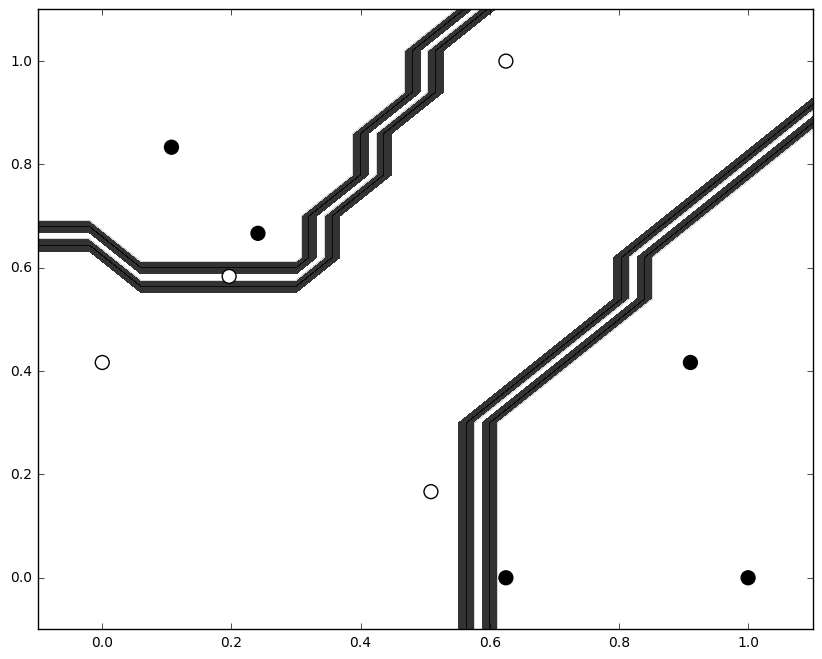

In [269]:
# plot the resulting classifier
h = 0.08
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, colors=('w', 'k', 'k'), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=colorMap, s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
fig.savefig(filePrefix + 'NN_contourf.png')

In [270]:
print Z.shape

(16, 16)


In [271]:
print Z

[[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]]
